In [2]:
# Impor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1. SVM di berbagai kernel

In [4]:
X, y = make_circles(n_samples=100, factor=0.4, noise=0.1, random_state=42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Fungsi untuk visualisasi hasil klasifikasi
def plot_svm_decision_boundary(X, y, clf, kernel_name):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Buat grid untuk plot decision boundary
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary dan margin
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.title(f'SVM dengan Kernel {kernel_name}')
    plt.xlabel('Fitur 1')
    plt.ylabel('Fitur 2')
    plt.show()

In [10]:
# Latih dan evaluasi SVM dengan berbagai kernel
kernels = [('linear', SVC(kernel='linear', C=1.0)),
           ('polynomial', SVC(kernel='poly', degree=3, C=1.0)),
           ('rbf', SVC(kernel='rbf', gamma='auto', C=1.0))]

Akurasi SVM dengan kernel linear: 0.30


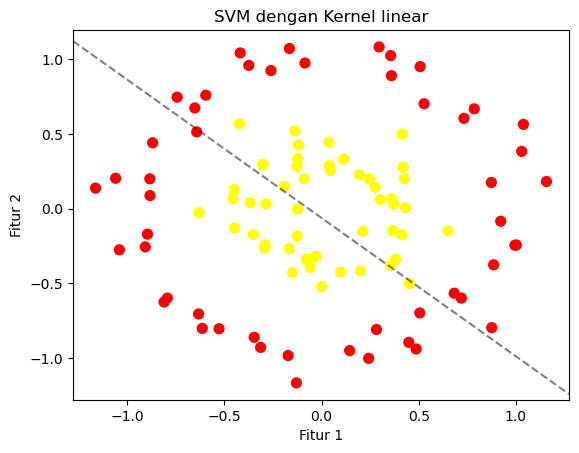

Akurasi SVM dengan kernel polynomial: 0.35


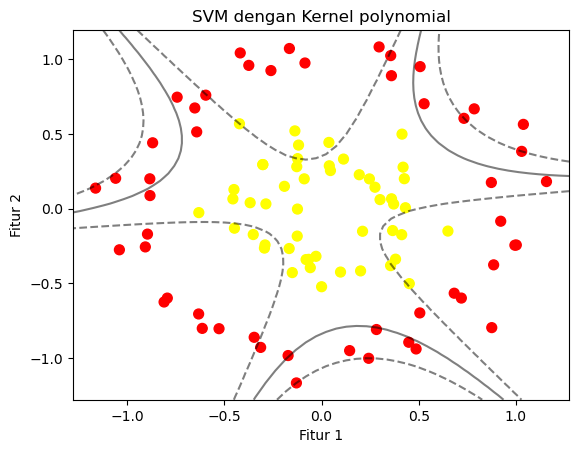

Akurasi SVM dengan kernel rbf: 1.00


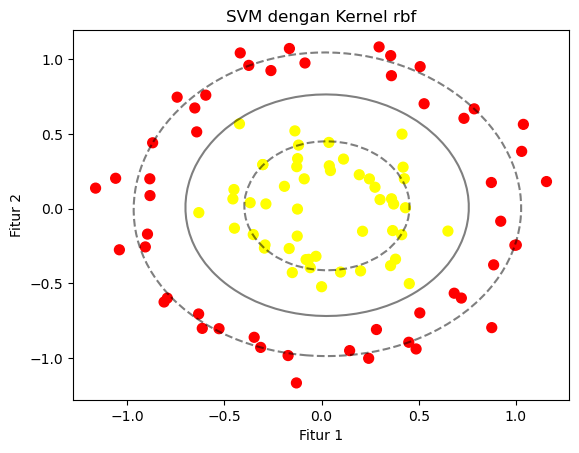

In [14]:
for kernel_name, clf in kernels:
    # Latih model
    clf.fit(X_train, y_train)
    
    # Prediksi pada data testing
    y_pred = clf.predict(X_test)
    
    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi SVM dengan kernel {kernel_name}: {accuracy:.2f}')
    
    # Visualisasi decision boundary
    plot_svm_decision_boundary(X, y, clf, kernel_name)

## 2. Tuning Hyperparameter
Kita akan melakukan pencarian hyperparameter secara sistematis guna menemukan kombinasi parameter terbaik untuk SVM menggunakan GridSearchCV. GridSearchCV menggunakan k-fold cross-validation untuk mengevaluasi performa model pada setiap kombinasi hyperparameter.

In [18]:
# Contoh tuning hyperparameter untuk kernel RBF
from sklearn.model_selection import GridSearchCV

In [20]:
# Parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto']
}

In [22]:
# Inisialisasi SVM dengan kernel RBF
svm_rbf = SVC(kernel='rbf')

In [24]:
# Lakukan GridSearchCV
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.01, 0.1, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [26]:
# Cetak parameter terbaik dan akurasi
print(f'Parameter terbaik (RBF): {grid_search.best_params_}')
print(f'Akurasi terbaik (RBF): {grid_search.best_score_:.2f}')

Parameter terbaik (RBF): {'C': 1, 'gamma': 'auto'}
Akurasi terbaik (RBF): 1.00


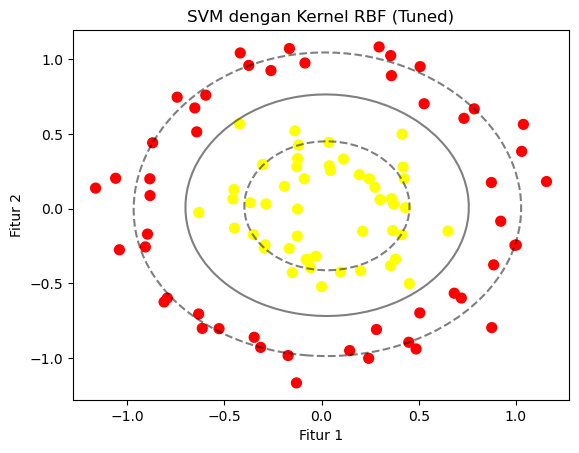

In [28]:
# Visualisasi model terbaik
best_clf = grid_search.best_estimator_
plot_svm_decision_boundary(X, y, best_clf, 'RBF (Tuned)')

- Dataset: Kode ini menggunakan make_circles dari scikit-learn untuk membuat dataset buatan dengan dua kelas yang membentuk lingkaran konsentris (data non-linier).
- Pemisahan Data: Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian.
Kernel yang Diuji:
    - Linier: Tidak menggunakan transformasi dimensi tinggi, cocok untuk data linier.
    - Polinomial: Memetakan data ke ruang dimensi tinggi dengan derajat polinomial (di sini degree=3).
    - RBF: Memetakan data ke ruang dimensi tak terbatas, sangat fleksibel untuk pola non-linier.
- Visualisasi: Fungsi plot_svm_decision_boundary menampilkan data dan batas keputusan (decision boundary) untuk setiap kernel.
- Tuning Hyperparameter: Menggunakan GridSearchCV untuk mencari kombinasi terbaik dari parameter C (regularisasi) dan gamma (lebar kernel RBF) untuk meningkatkan performa model.

# 3. Kernel Trick vs Transformasi Eksplisit 

- Dalam transformasi eksplisit, kita secara manual memetakan titik data ke ruang dimensi tinggi menggunakan fungsi pemetaan $ \phi $, lalu menghitung produk skalar di ruang tersebut.
- Dengan kernel trick, kita tidak menghitung koordinat di ruang dimensi tinggi, melainkan langsung menggunakan fungsi kernel untuk mendapatkan produk skalar di ruang tersebut.
- Keunggulan:
    - Tidak perlu menghitung atau menyimpan koordinat di ruang dimensi tinggi.
    - Jauh lebih efisien, terutama untuk kernel seperti RBF yang memetakan ke dimensi tak terbatas.
    - Skalabel untuk dataset besar dan kernel kompleks.

### Mengapa Kernel Trick Lebih Efisien?

- Transformasi Eksplisit: Memerlukan perhitungan dan penyimpanan koordinat baru, yang bisa sangat mahal untuk dataset besar atau pemetaan ke dimensi tinggi (misalnya, kernel polinomial derajat tinggi atau RBF).
- Kernel Trick: Hanya menghitung fungsi kernel di ruang asli, yang biasanya sederhana dan cepat, bahkan untuk kernel yang memetakan ke dimensi tak terbatas.

In [46]:
import numpy as np

x = np.array([1, 2])
y = np.array([3, 4])

In [48]:
# 1. Transformasi eksplisit
def explicit_mapping(x):
    return np.array([x[0]**2, x[1]**2, np.sqrt(2)*x[0]*x[1]])

phi_x = explicit_mapping(x)  # (1, 4, 2*sqrt(2))
phi_y = explicit_mapping(y)  # (9, 16, 12*sqrt(2))
explicit_dot = np.dot(phi_x, phi_y)
print(f"Produk skalar (eksplisit): {explicit_dot}")

Produk skalar (eksplisit): 121.00000000000001


In [50]:
# 2. Kernel trick (polinomial derajat 2)
kernel_dot = np.dot(x, y)**2
print(f"Produk skalar (kernel trick): {kernel_dot}")

Produk skalar (kernel trick): 121
